# Zachary Bergquist - Final Project
### "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [70]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#import knnclassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from pandas.plotting import parallel_coordinates

## Background
#### Information from the top 5000 movies from IMDb have been scraped and organized. This information will be further analyzed in order to find which factors are important when predicting a movie's success.

## Goals of the project:
- Predict the success of a movie before it is released based on comparing certain traits of "good" and "bad" movies from IMDb.
- Success is determined by its IMDb rating

## If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?
- Duration
- Number of votes
- Social media popularity of the movie
- Social media popularity of the top three actors
- Social media popularity of the director
- Success of director's past movies
- ROI ratio
- Profit
- Budget

## What variables are highly correlated to imdb score?
- Director's past success
- Number of votes is highly correlated to IMDb score
- Duration is highly correlated to a movie's success
- Number of critics who reviewed the movie
- Numbmer of users who reviewed the movie
- Social Media popularity of the movie
- Gross earnings
- Social Media popularity of the director

## Data Understanding

In [71]:
# Read in .csv file containing scraped info from IMDb
data = pd.read_csv("C:\Users\zacha\OneDrive - Kansas State University\MIS 665\Midterm Project\movie_metadata.csv_movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [72]:
# Check column names, number of observations, data type
print data.columns
print len(data)
print data.info()

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')
5043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes    

In [73]:
# Check for any missing values
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### The data currently has a significant amount of missing values that could affect the accuracy of the rating prediction system.
- Any rows with missing values will be removed.

### Some new columns could be created to better analyze the data:
- Top 3 actors' total Facebook likes combined into one column
- ROI ratio = (profit/budget)
- Proportionate average IMDb score for each director = total score for all movies made by that director / total movies made by that director

### Columns can be removed to remove redundancy or extraneous/insignificant information:
- actor 1 facebook likes
- actor 2 facebook likes
- actor 3 facebook likes
- color
- language
- aspect ratio
- movie imdb link
- genres
- plot keywords

In [74]:
# Creates a new column with the total of the top 3 actors' facebook likes
data['top_3_actors_likes'] = data.actor_1_facebook_likes + data.actor_2_facebook_likes + data.actor_3_facebook_likes

# This new column is then organized by IMDb rating
data.groupby('imdb_score')['top_3_actors_likes'].value_counts().head()

imdb_score  top_3_actors_likes
1.6         679.0                 1
1.7         1830.0                1
1.9         1094.0                1
            1211.0                1
            1822.0                1
Name: top_3_actors_likes, dtype: int64

In [75]:
# Shows count of all movies in terms of duratio,n sorted by IMDb score
data.groupby('imdb_score')['duration'].value_counts().head()

imdb_score  duration
1.6         115.0       1
1.7         91.0        1
1.9         88.0        2
            97.0        1
2.0         93.0        1
Name: duration, dtype: int64

In [76]:
# Shows count of all movies in terms of budget, sorted by IMDb score.
data.groupby('imdb_score')['budget'].value_counts().head()

imdb_score  budget    
1.6         13000000.0    1
1.7         65000000.0    1
1.9         1000000.0     1
            20000000.0    1
            25000000.0    1
Name: budget, dtype: int64

In [77]:
# The amount of facebook likes for each movie, sorted by IMDb rating
data.groupby('imdb_score').director_facebook_likes.value_counts().head()

imdb_score  director_facebook_likes
1.6         209.0                      1
1.7         11.0                       1
1.9         0.0                        1
            82.0                       1
            84.0                       1
Name: director_facebook_likes, dtype: int64

In [78]:
# Number of faces on the movie poster, sorted by IMDb rating
data.groupby('imdb_score')['facenumber_in_poster'].value_counts().head()

imdb_score  facenumber_in_poster
1.6         1.0                     1
1.7         0.0                     1
1.9         0.0                     1
            2.0                     1
            3.0                     1
Name: facenumber_in_poster, dtype: int64

## Data Preparation

In [79]:
# Remove any rows that are missing values
dropped = data.dropna()

In [80]:
# Organize ratings
cleaned = dropped.replace({'content_rating': 'M'},{'content_rating': 'PG'})
cleaned = cleaned.replace({'content_rating': 'GP'},{'content_rating': 'PG'})
cleaned = cleaned.replace({'content_rating': 'X'},{'content_rating': 'NC-17'})
cleaned = cleaned.replace({'content_rating': 'Approved'},{'content_rating': 'R'})
cleaned = cleaned.replace({'content_rating': 'Not Rated'},{'content_rating': 'R'})
cleaned = cleaned.replace({'content_rating': 'Passed'},{'content_rating': 'R'})
cleaned = cleaned.replace({'content_rating': 'Unrated'},{'content_rating': 'R'})

In [81]:
# Check that replacements are in effect
cleaned.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'NC-17'], dtype=object)

In [82]:
# Drop the color, language, aspect ratio, movie link, genres, plot keywords, actor 1 facebook likes,
# actor 2 facebook likes, and actor 3 facebook likes columns, as they are statistically insignificant
df1 = cleaned.drop(['color','language','aspect_ratio', 'movie_imdb_link', 'genres', 'plot_keywords', 'actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes'], axis=1)

In [83]:
# Create a profit column
df1['profit'] = df1.gross - df1.budget

In [84]:
# Create a return on investment percentage column
df1['roi_ratio'] = (df1.profit/df1.budget)

In [85]:
# Creates a variable that calculates the proportional average of each director's success (total IMDb score for each director / number of movies made for that director)
dir_total_score = df1['imdb_score'].groupby(df1['director_name']).transform('sum')
dir_num_movies = df1['imdb_score'].groupby(df1['director_name']).transform('size')
df1['dir_avg_score'] = dir_total_score/dir_num_movies

In [86]:
# Check that all columns were created/removed/changed appropriately
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 23 columns):
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_2_name                 3756 non-null object
gross                        3756 non-null float64
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
country                      3756 non-null object
content_rating               3756 non-null object
budget                       3756 non-null float64
title_year                   3756 non-null float64
imdb_score                   3756 non

## Data Visualization

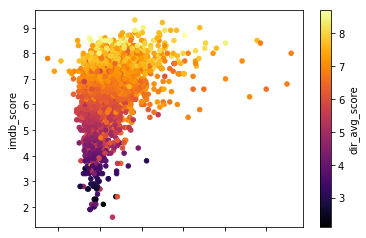

In [87]:
# This scatter plot shows the relationship between duration of a movie and its IMDb score. The effect of the director's average score is also included.
df1.plot.scatter(x='duration', y='imdb_score', c= 'dir_avg_score', colormap= 'inferno')

### From this graph, we can see that more successful movies tend to be longer in duration.
### It is also apparent that the director's average IMDb score has a large effect on the movie's success.

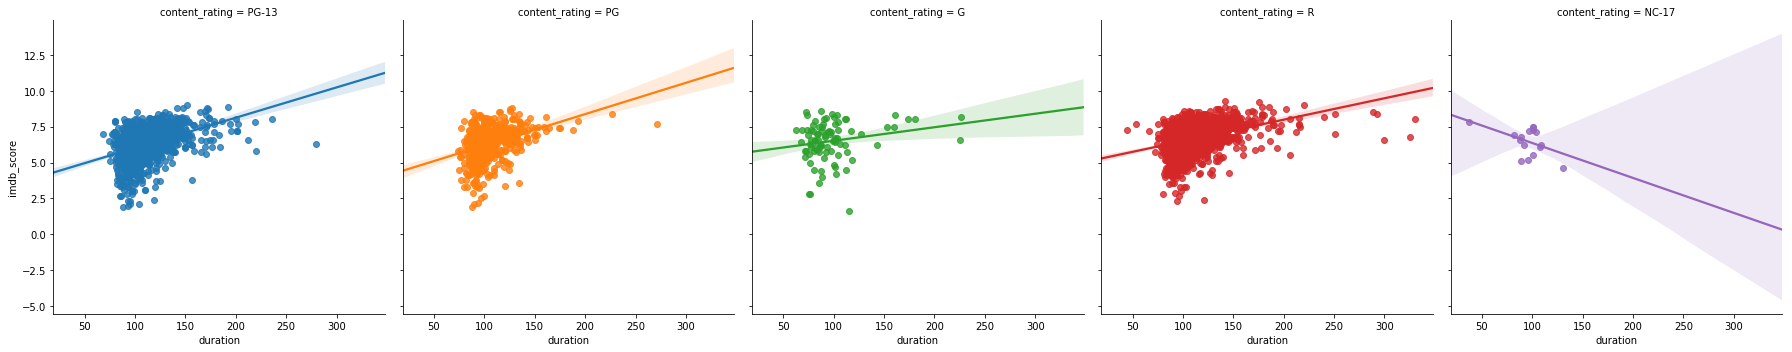

In [88]:
# Compares relationship between duration to IMDb score, separated by content rating category.
sns.lmplot(x='duration', y="imdb_score", col='content_rating', hue="content_rating", data=df1, col_wrap=5)

### This set of charts further analyzes the relationship between duration and IMDb score.
### We can see that movies with an NC-17 rating are the only category where the relationship is not positive.
### Another interesting find from this information is that the relationship is not as strong for movies rated 'G'. This makes sense, as children
### generally have shorter attention spans.
### The rating category of 'R' has more movies with longer durations than the others.


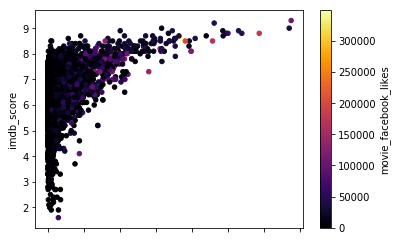

In [89]:
# This scatter plot shows the relationship between the number of users who voted compared to its IMDb score. Also included are the number of facebook likes.
df1.plot.scatter(x='num_voted_users', y='imdb_score', c='movie_facebook_likes', colormap= 'inferno')

### This demonstrates how the popularity positively affects a movie's score.
### Both the number of ratings on IMDb and the number of likes the movie has on Facebook are included.

## Data Correlation

### First, object columns must be removed, as they provide no value in correlation analysis:
- Director name
- Actor 1 name
- Actor 2 name
- Actor 3 name
- Movie title
- Country

### Some data types need to be changed from categorical to numerical for correlation analysis.
- Content rating

In [90]:
# Replace content rating categorical values with numerical values: G:0, PG:1, PG-13:2, R:3, NC-17:4
df_corr = df1.replace({'content_rating': 'G'}, {'content_rating': 0})
df_corr = df_corr.replace({'content_rating': 'PG'}, {'content_rating': 1})
df_corr = df_corr.replace({'content_rating': 'PG-13'}, {'content_rating': 2})
df_corr = df_corr.replace({'content_rating': 'R'}, {'content_rating': 3})
df_corr = df_corr.replace({'content_rating': 'NC-17'}, {'content_rating': 4})

In [91]:
# Change content rating column from object to numeric
df_corr = df_corr.infer_objects()

In [92]:
# Check content rating values and type
df_corr.content_rating.unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [93]:
df1_corr = df_corr.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'country'], axis=1)

In [94]:
# Correlation testing
df1_corr.corr()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,movie_facebook_likes,top_3_actors_likes,profit,roi_ratio,dir_avg_score
num_critic_for_reviews,1.000000,0.228631,0.175128,0.464187,0.592473,0.236533,-0.034365,0.563684,0.069851,0.104717,0.420202,0.347886,0.705226,0.226519,0.039029,0.032607,0.372503
duration,0.228631,1.000000,0.180644,0.245726,0.339592,0.120179,0.026919,0.351595,0.090448,0.068012,-0.130211,0.366221,0.215303,0.114314,0.008296,-0.033681,0.361773
director_facebook_likes,0.175128,0.180644,1.000000,0.138351,0.299624,0.118547,-0.048067,0.217103,0.012837,0.018167,-0.044656,0.192314,0.161962,0.115319,0.024455,-0.006600,0.229942
gross,0.464187,0.245726,0.138351,1.000000,0.624949,0.235601,-0.032025,0.544674,-0.276183,0.099496,0.054808,0.214740,0.366933,0.212881,0.208033,0.017804,0.180292
num_voted_users,0.592473,0.339592,0.299624,0.624949,1.000000,0.249119,-0.032209,0.778881,0.007462,0.065927,0.023687,0.482430,0.517751,0.237386,0.126327,0.009859,0.380153
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.235601,0.249119,1.000000,0.080687,0.178675,-0.009827,0.028682,0.127045,0.106803,0.205564,0.997212,0.043862,-0.019291,0.111187
facenumber_in_poster,-0.034365,0.026919,-0.048067,-0.032025,-0.032209,0.080687,1.000000,-0.080971,0.017135,-0.021673,0.070093,-0.065493,0.015185,0.076703,0.011510,-0.013789,-0.062883
num_user_for_reviews,0.563684,0.351595,0.217103,0.544674,0.778881,0.178675,-0.080971,1.000000,0.045573,0.070372,0.019470,0.325003,0.370465,0.168669,0.097406,0.068445,0.275222
content_rating,0.069851,0.090448,0.012837,-0.276183,0.007462,-0.009827,0.017135,0.045573,1.000000,-0.035209,-0.014291,0.133825,0.011394,-0.003837,-0.049856,0.023948,0.093724
budget,0.104717,0.068012,0.018167,0.099496,0.065927,0.028682,-0.021673,0.070372,-0.035209,1.000000,0.047138,0.029190,0.052490,0.026547,-0.952570,-0.008189,0.051556


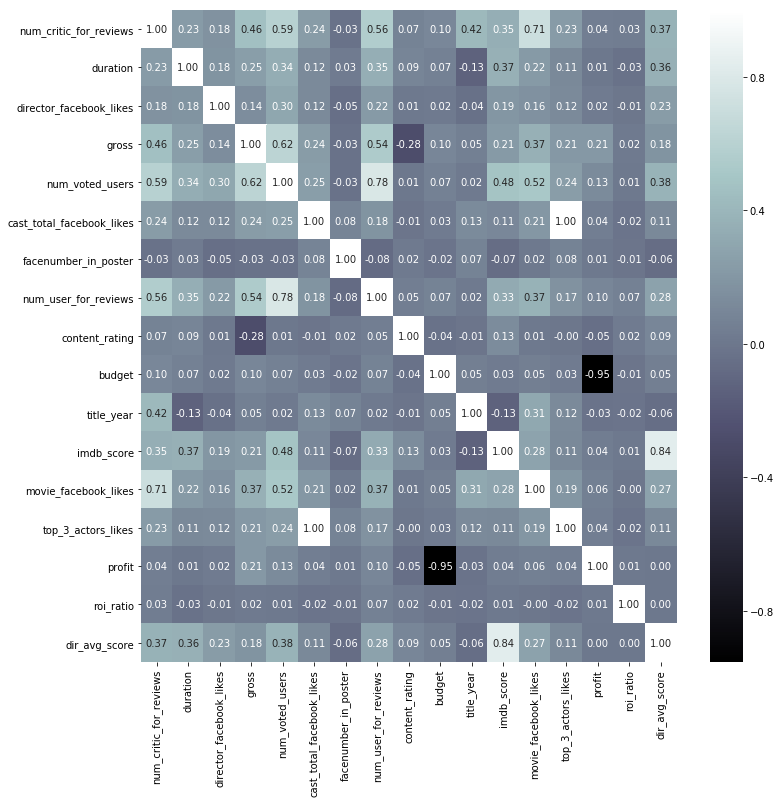

In [95]:
# Correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df1_corr.corr(), annot=True, fmt=".2f", cmap='bone')

### From this heatmap, we can see that the director's average IMDb score, amount of facebook likes the movie has,
### the movie's duration, and the amount of people who voted/reviewed on IMDb have the highest positive correlation with IMDb score.
### The movie the year was made is negative. This means that the older a movie is, the higher its rating. This factor however, will not
### help us predict the success of future movies.
### Factors that are irrelevant for prediction can be removed.
- Title year

### The insignificant factors, which I will consider a <|0.15| correlation, can also be removed in order to easier find the most correlated factors.
- ROI ratio
- Profit
- Top 3 actors' Facebook likes
- Budget
- Content rating
- Face number in poster
- Cast total Facebook likes

In [96]:
df_corr.drop
df1_corr = df_corr.drop(['roi_ratio', 'profit', 'budget', 'facenumber_in_poster', 'top_3_actors_likes', 'title_year', 'content_rating', 'cast_total_facebook_likes'], axis=1)

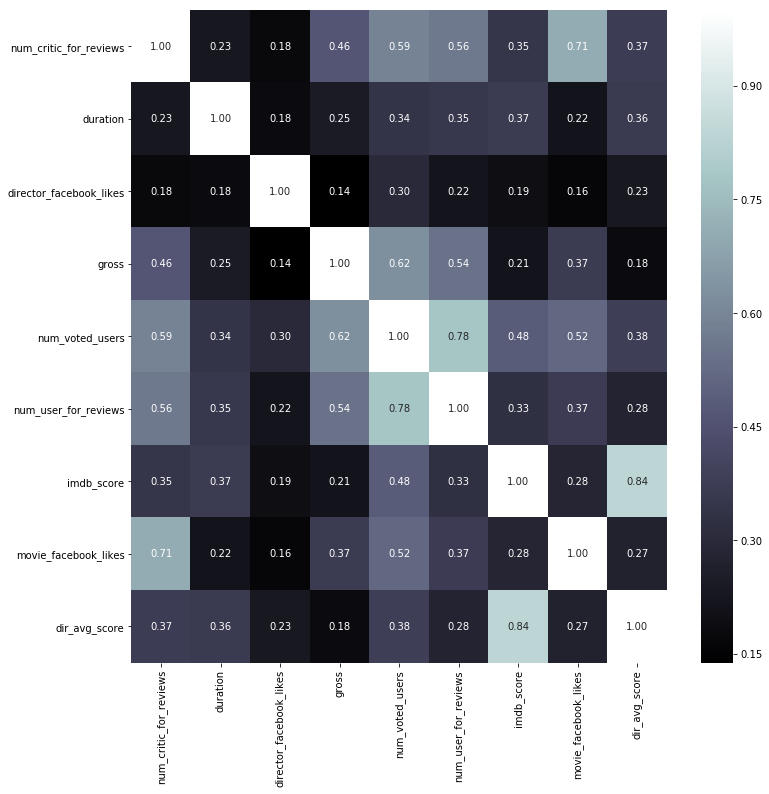

In [97]:
# Correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df1_corr.corr(), annot=True, fmt=".2f", cmap='bone')

### This further analysis of the heatmap shows the top correlating factors when determining the success of a movie. In order from most to least:
- Director's average score
- Number of users who voted on IMDb
- Duration
- Number of critics who wrote reviews on IMDb
- Number of users who wrote reviews on IMDb
- Amount of Facebook likes for the movie
- Gross earnings
- Amount of Facebook likes for the director

## Storytelling

### There are several factors that go into predicting the success of a movie. The highest correlated factors for any movie
### are dependent on the director: their past history and their popularity on Facebook. 

### NC-17 films have a higher than average rating compared to the other content rating categories.

### If the movie has a more adult content rating, a longer duration may positively affect the success. However,
### a longer duration for a 'G' movie would not influence success as much.

### The higher the amount of popularity -- whether in the form of votes, review, or Facebook likes -- are a great determinate of the movie's potential success. 

### The profit of a movie is surprisingly not correlated to its success. This applies to movies with large and small budgets.

## Categorization

In [98]:
# Reuse a previously cleaned and organized df, before many of the columns have been dropped.
final = df_corr
final.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,top_3_actors_likes,profit,roi_ratio,dir_avg_score
0,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,4834,...,USA,2,237000000.0,2009.0,7.9,33000,2791.0,523505847.0,2.208885,7.914286
1,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,...,USA,2,300000000.0,2007.0,7.1,0,46000.0,9404152.0,0.031347,6.985714
2,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,11700,...,UK,2,245000000.0,2015.0,6.8,85000,11554.0,-44925825.0,-0.183371,7.500000
3,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,...,USA,2,250000000.0,2012.0,8.5,164000,73000.0,198130642.0,0.792523,8.425000
5,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,212204,1873,...,USA,2,263700000.0,2012.0,6.6,24000,1802.0,-190641321.0,-0.722948,7.733333


In [99]:
# Drop categorical columns with too many categories
final1 = final.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'country', 'movie_title'], axis=1)

In [100]:
# Categorize movies (bad[1], okay[2], good[3], excellent[4]) based on their imdb score.
final1['category'] = 1
final1['category'][(final1['imdb_score'] >= 4) & (final1['imdb_score'] < 6)] = 2
final1['category'][(final1['imdb_score'] >= 6) & (final1['imdb_score'] < 8)] = 3
final1['category'][final1['imdb_score'] > 8] = 4

C:\Users\zacha\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zacha\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zacha\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Simple Regression

In [102]:
# Define X & y
y = final1['imdb_score']
X = final1.drop(['category', 'imdb_score'], axis=1)

In [103]:
reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+num_user_for_reviews+content_rating+budget+title_year+movie_facebook_likes+top_3_actors_likes+profit+roi_ratio+dir_avg_score", final1)
reg = reg_model.fit()
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     756.7
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:08:32   Log-Likelihood:                -2914.8
No. Observations:                3756   AIC:                             5862.
Df Residuals:                    3740   BIC:                             5961.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Lasso

In [104]:
#Fit the model
lasso = lm.Lasso(alpha = 0.1)
lasso.fit(X, y)
lasso_y = lasso.predict(X)

C:\Users\zacha\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [105]:
print 'Coefficients: ', lasso.coef_
print "y-intercept ", lasso.intercept_

Coefficients:  [ 5.00496839e-04  3.30794635e-03 -1.38718934e-05 -8.69792311e-10
  2.51352350e-06 -3.03883928e-05 -0.00000000e+00 -3.08488937e-04
  0.00000000e+00 -2.09060332e-10 -1.09178834e-02 -3.39182494e-07
  3.05530065e-05 -1.45608771e-10  8.44755529e-05  7.11168394e-01]
y-intercept  23.22345557951099


In [106]:
coef = ["%.3f" % i for i in lasso.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.003'),
 ('director_facebook_likes', '-0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('content_rating', '0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.011'),
 ('movie_facebook_likes', '-0.000'),
 ('top_3_actors_likes', '0.000'),
 ('profit', '-0.000'),
 ('roi_ratio', '0.000'),
 ('dir_avg_score', '0.711')]

In [107]:
a = zip(xcolumns, coef)
df = pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
15,dir_avg_score,0.711
1,duration,0.003
0,num_critic_for_reviews,0.001
4,num_voted_users,0.000
8,content_rating,0.000
12,top_3_actors_likes,0.000
14,roi_ratio,0.000
10,title_year,-0.011
2,director_facebook_likes,-0.000
3,gross,-0.000


### The lasso regression removes most of the variables, leaving only dir_avg_score, duration, and num_critic_for_reviews. The removed variables have coefficients close to 0 or are negative. I like this model, but would prefer the number of users as opposed to the number of critics.

In [108]:
print "variance or r-squared: ", explained_variance_score(y, lasso_y)

variance or r-squared:  0.734038181557709


### F Selection

In [109]:
# Using f_selection to determine the 3 most important factors
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[1.78000000e+02, 8.86204000e+05, 7.91428571e+00],
       [1.69000000e+02, 4.71220000e+05, 6.98571429e+00],
       [1.48000000e+02, 2.75868000e+05, 7.50000000e+00],
       ...,
       [7.70000000e+01, 7.26390000e+04, 7.00000000e+00],
       [8.10000000e+01, 5.20550000e+04, 5.69230769e+00],
       [9.00000000e+01, 4.28500000e+03, 6.10000000e+00]])

In [110]:
final1.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,movie_facebook_likes,top_3_actors_likes,profit,roi_ratio,dir_avg_score,category
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,2,237000000.0,2009.0,7.9,33000,2791.0,523505847.0,2.208885,7.914286,3


In [111]:
# F Selection chooses duration, num_voted_users, and dir_avg_score columns
# Show the calculated R^2 value of the model
f_reg = lm.LinearRegression()
f_reg.fit(X_new, y)
f_reg_y = f_reg.predict(X_new)

print "r-squared: ", explained_variance_score(y, f_reg_y)

r-squared:  0.7318660832942132


In [112]:
f_reg = ols("imdb_score~duration+num_voted_users+dir_avg_score", final1)
f_reg = f_reg.fit()
print f_reg.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3414.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:08:33   Log-Likelihood:                -3062.6
No. Observations:                3756   AIC:                             6133.
Df Residuals:                    3752   BIC:                             6158.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3371      0.074     

### This is the model I like most, as it only uses three basic variables: How good the director's previous movies have been, how long it is, and the popularity of non-critic viewers. It has a fairly high variance score of 0.732.

### Recursive Feature Selection

In [113]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'content_rating'), (1, 'dir_avg_score'), (2, 'title_year'), (3, 'facenumber_in_poster'), (4, 'duration'), (5, 'num_critic_for_reviews'), (6, 'num_user_for_reviews'), (7, 'roi_ratio'), (8, 'top_3_actors_likes'), (9, 'cast_total_facebook_likes'), (10, 'director_facebook_likes'), (11, 'num_voted_users'), (12, 'movie_facebook_likes'), (13, 'budget'), (14, 'profit'), (15, 'gross')]


### Oddly, Recursive Feature Selection lists content_rating as the most important, which is not listed in any of the other methods.

### Normalization

In [ ]:
from sklearn.preprocessing import Normalizer

y = final1['imdb_score'] 
X = final1.drop(['imdb_score','category'], axis =1)

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

In [45]:
model = lm.LinearRegression()
model.fit(normalizedX, y)
model_y = model.predict(normalizedX)
print 'Coefficients: ', model.coef_
print "y-intercept ", model.intercept_

Coefficients:  [ 1.50010414e+03 -1.77326100e+03 -3.37961361e+01 -2.24585291e-01
  3.60064310e+01 -2.64069344e+02 -4.51443983e+04 -6.17735643e+03
  2.34943562e+04 -5.39980840e-01 -1.55179869e+03  1.19628512e+01
  2.62906734e+02  3.15396526e-01  3.89149957e+01  5.42649728e+05]
y-intercept  6.842982000997704


In [46]:
print "mean square error: ", mean_squared_error(y, model_y)
print explained_variance_score(y, model_y)

mean square error:  0.9740931873571652
0.1266559331996443


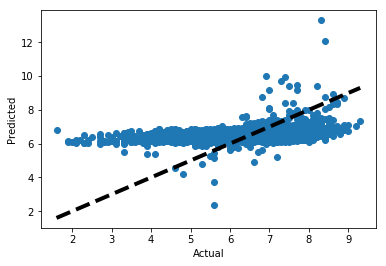

In [47]:
plt.subplots()
plt.scatter(y, model_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### After normalizing the data, it is clear that this model does not accurately predict the outcome of a movie's success. The R^2 value is 0.127.

### Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = final1['imdb_score'] 
X = final1.drop(['imdb_score','category'], axis =1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.047137060702875405
variance or r-squared:  0.9577478131950738


In [64]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.004849685065423418, 'content_rating'),
 (0.006347057929707106, 'facenumber_in_poster'),
 (0.009495244341944853, 'top_3_actors_likes'),
 (0.010724335754772347, 'cast_total_facebook_likes'),
 (0.011180965699747037, 'movie_facebook_likes'),
 (0.013219904901821511, 'num_critic_for_reviews'),
 (0.014213916349590702, 'gross'),
 (0.015063744044819517, 'roi_ratio'),
 (0.0154242565081883, 'director_facebook_likes'),
 (0.018608388611656933, 'num_user_for_reviews'),
 (0.019505208823417445, 'title_year'),
 (0.02551031151722598, 'duration'),
 (0.02673979703999938, 'profit'),
 (0.027088436930675523, 'budget'),
 (0.07456647001004978, 'num_voted_users'),
 (0.7074622764709602, 'dir_avg_score')]

### This method has an abnormally high variance score of 0.958 compared to the other tests. It lists the most important factor as being dir_avg_score by a large margin, with num_voted_users, budget, profit, and duration coming next.

### Decision Tree

In [116]:
# declare X variables and y variable
y = final1['category'] 
X = final1.drop(['imdb_score','category'], axis =1)

In [117]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

2629 2629
1127 1127


In [165]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"

0.7684117125110914
--------------------------------------------------------
[[ 26   6  11   2]
 [  8 195  87   0]
 [ 17  92 612  19]
 [  8   0  11  33]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.44      0.58      0.50        45
          2       0.67      0.67      0.67       290
          3       0.85      0.83      0.84       740
          4       0.61      0.63      0.62        52

avg / total       0.77      0.77      0.77      1127

--------------------------------------------------------


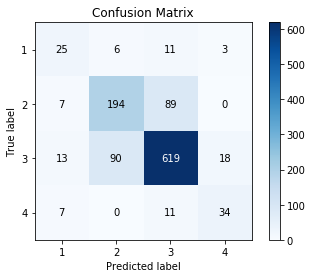

In [120]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

### The decision tree model has a high variance score of 0.774 when categorizing movies. The most accurate category appears to be those that are "good".

### Simple Decision Tree

In [121]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Build a decision model with max_depth=3 and min_samples_leaf=5
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [164]:
print metrics.accuracy_score(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_simple.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"

0.8305235137533274
--------------------------------------------------------
[[ 20   8  14   3]
 [  2 185 103   0]
 [  0  35 695  10]
 [  0   0  16  36]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.91      0.44      0.60        45
          2       0.81      0.64      0.71       290
          3       0.84      0.94      0.89       740
          4       0.73      0.69      0.71        52

avg / total       0.83      0.83      0.82      1127

--------------------------------------------------------


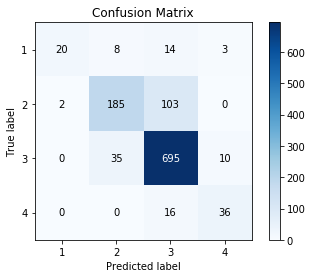

In [124]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt_simple.predict(X_test))
plt.show()

### This model has a higher variance score of 0.831, but is not as detailed.

### KNN

In [151]:
# declare X variables and y variable
y = final1['category'] 
X = final1.drop(['imdb_score','category'], axis =1)

In [152]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [163]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"

0.6202307009760426
--------------------------------------------------------
[[  0  10  35   0]
 [  0  48 242   0]
 [  0  91 649   0]
 [  0   1  49   2]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          2       0.32      0.17      0.22       290
          3       0.67      0.88      0.76       740
          4       1.00      0.04      0.07        52

avg / total       0.57      0.62      0.56      1127

--------------------------------------------------------


C:\Users\zacha\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [154]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.55851064 0.49468085 0.53191489 0.52393617 0.5212766  0.40159574
 0.3962766  0.42287234 0.456      0.67828418]
0.49853480120928645


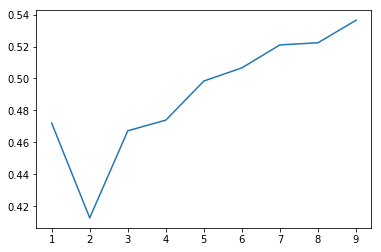

In [156]:
# automatic grid search for an optimal value of K
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [157]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.536474973376
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [158]:
# develop a new knn model with k = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [162]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))

0.6202307009760426
[[  0  10  35   0]
 [  0  48 242   0]
 [  0  91 649   0]
 [  0   1  49   2]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          2       0.32      0.17      0.22       290
          3       0.67      0.88      0.76       740
          4       1.00      0.04      0.07        52

avg / total       0.57      0.62      0.56      1127



C:\Users\zacha\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN uses 9 variables, but only has a variance of 0.62 when categorizing movies.

### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000)    #building 1000 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8473824312333629

In [161]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.8473824312333629
[[ 21   7  15   2]
 [  2 201  87   0]
 [  0  35 700   5]
 [  1   0  18  33]]
             precision    recall  f1-score   support

          1       0.88      0.47      0.61        45
          2       0.83      0.69      0.75       290
          3       0.85      0.95      0.90       740
          4       0.82      0.63      0.72        52

avg / total       0.85      0.85      0.84      1127



In [166]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
15,dir_avg_score,0.368762
4,num_voted_users,0.106301
1,duration,0.063592
7,num_user_for_reviews,0.047853
3,gross,0.045995
13,profit,0.042644
0,num_critic_for_reviews,0.041518
9,budget,0.039877
10,title_year,0.038045
14,roi_ratio,0.036597


In [169]:
probs = clf.predict_proba(X_test)
probs = pd.DataFrame(probs, columns=['prob of BAD', 'prob of OKAY', 'prob of GOOD', 'prob of EXCELLENT'])
probs.head()

,prob of BAD,prob of OKAY,prob of GOOD,prob of EXCELLENT
0,0.003,0.102,0.894,0.001
1,0.025,0.957,0.018,0.000
2,0.003,0.356,0.641,0.000
3,0.000,0.059,0.941,0.000
4,0.014,0.008,0.865,0.113


### After 1000 itereations, the Random Forest model proves very accurate at 0.847.

## Clustering

In [208]:
cluster = final1.drop(['num_critic_for_reviews','director_facebook_likes','gross','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','content_rating','budget','title_year','imdb_score','movie_facebook_likes','top_3_actors_likes','profit','roi_ratio','category'], axis = 1)
cluster.head()

,duration,num_voted_users,dir_avg_score
0,178.0,886204,7.914286
1,169.0,471220,6.985714
2,148.0,275868,7.500000
3,164.0,1144337,8.425000
5,132.0,212204,7.733333


In [209]:
# Normalize data
norm = (cluster - cluster.mean()) / (cluster.max() - cluster.min())
norm.head()

,duration,num_voted_users,dir_avg_score
0,0.231201,0.461851,0.219546
1,0.200485,0.216251,0.078853
2,0.128812,0.100636,0.156775
3,0.183420,0.614622,0.296927
5,0.074205,0.062957,0.192129


In [210]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [211]:
k_means.labels_

array([1, 1, 1, ..., 2, 3, 3])

In [204]:
cluster2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
cluster2.head()

,cluster
0,1
1,1
2,1
3,1
4,2


In [212]:
cluster3 = norm.join(cluster2)
cluster3.head()

,duration,num_voted_users,dir_avg_score,cluster
0,0.231201,0.461851,0.219546,1.0
1,0.200485,0.216251,0.078853,1.0
2,0.128812,0.100636,0.156775,1.0
3,0.183420,0.614622,0.296927,1.0
5,0.074205,0.062957,0.192129,1.0


In [213]:
cluster3.groupby(['cluster']).mean() 

,duration,num_voted_users,dir_avg_score
cluster,,,
0.0,-0.005278,-0.001605,-0.019966
1.0,0.029633,0.043953,0.021272
2.0,0.003342,0.002090,-0.003953
3.0,0.003928,0.000714,-0.005903


### Profiling
- Cluster 0 has a short duration, low number of user votes, and a low average director score.
- Cluster 1 has a long duration, high number of user votes, and a high average director score.
- Cluster 2 has a medium duration, medium number of user votes, and a medium average director score.
- Cluster 3 has a medium duration, low number of user votes, and a medium average director score.

In [215]:
cluster4 = cluster.join(cluster2)
cluster4.head()

,duration,num_voted_users,dir_avg_score,cluster
0,178.0,886204,7.914286,1.0
1,169.0,471220,6.985714,1.0
2,148.0,275868,7.500000,1.0
3,164.0,1144337,8.425000,1.0
5,132.0,212204,7.733333,1.0


In [216]:
cluster4.groupby('cluster').size()

cluster
0.0     208
1.0     302
2.0    1514
3.0    1189
dtype: int64

- Cluster 1 has 208 movies
- Cluster 2 has 302 movies
- Cluster 3 has 1514 movies
- Cluster 4 has 1189 movies

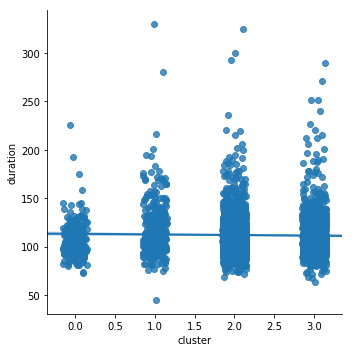

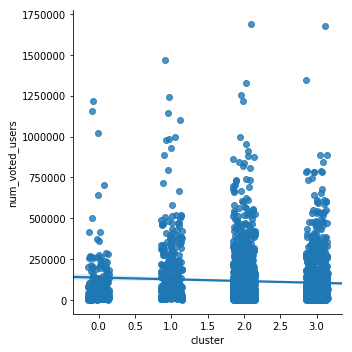

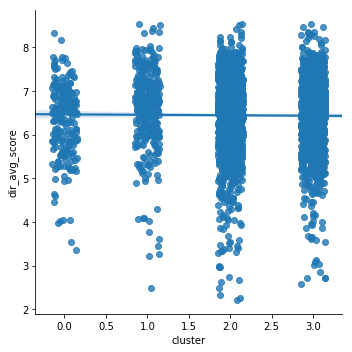

In [217]:
sns.lmplot("cluster", "duration", cluster4, x_jitter=.15, y_jitter=.15)
sns.lmplot("cluster", "num_voted_users", cluster4, x_jitter=.15, y_jitter=.15)
sns.lmplot("cluster", "dir_avg_score", cluster4, x_jitter=.15, y_jitter=.15)

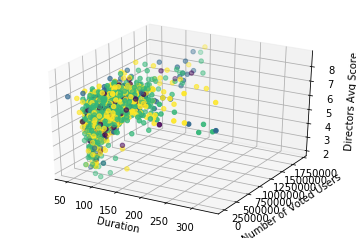

In [226]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = cluster4['duration']
y = cluster4['num_voted_users']
z = cluster4['dir_avg_score'] 
colors = cluster4['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of Voted Users')
ax.set_zlabel('Director''s Avg Score')

plt.show()

### Optimal K value (Elbow Method)

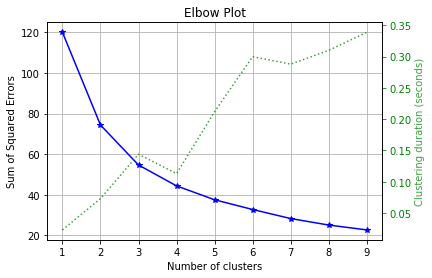

In [249]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, norm, cluster_ranges=range(1, 10))

## Storytelling

- Overall, duration, the number of voters, and the director's average movie score were the most important factors in predicting a movie's success.
- The Random Forest model with 1000 iterations of predicting proved the most effective with 84.7% accuracy in placing a movie in the correct category.
- Using a simple regression model that includes all possible vairables has a 75.2% accuracy.